### Quantitative Analysis Using Pynance and Ta-Lib

### **Load yfinance dataset**

In [2]:
import sys, os
import pandas

# Add the 'scripts' directory to the python path
sys.path.append(os.path.abspath(os.path.join('..','scripts')))

# Import stock_indicators moudle 
from stock_indicators import *

# Extract multiple dtasets and concatenate into one dataset
stocks = ['AAPL','AMZN','GOOG','META','MSFT','TSLA']  # tikers can be found in https://finance.yahoo.com/

# Fetch stock datasets 
start_date = '2014-01-01'
end_date   = '2024-12-31'
df = fetch_historical_data(stocks,start_date = start_date,end_date=end_date)

#display the dataset

df.head()

,Open,High,Low,Close,Volume,stock
Date,,,,,,
2024-12-31,252.163,253.002,249.156,250.145,39524126.0,AAPL
2024-12-30,251.953,253.222,250.475,251.923,35596636.0,AAPL
2024-12-27,257.547,258.416,252.782,255.309,42401889.0,AAPL
2024-12-26,257.906,259.814,257.347,258.736,27292958.0,AAPL
2024-12-24,255.209,257.926,255.010,257.916,23260251.0,AAPL


In [3]:
# check the size of the dataset
df.shape

(16550, 6)

In [4]:
# check missing values
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
stock     0
dtype: int64

In [5]:
# check the data types
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
stock      object
dtype: object

In [6]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# consise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16550 entries, 2024-12-31 to 2014-01-02
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    16550 non-null  float64
 1   High    16550 non-null  float64
 2   Low     16550 non-null  float64
 3   Close   16550 non-null  float64
 4   Volume  16550 non-null  float64
 5   stock   16550 non-null  object 
dtypes: float64(5), object(1)
memory usage: 905.1+ KB


### **Apply Analysis Indicator with TA-Lib**

#### Compute Technical Indicators

In [ ]:
# import talib library 
import talib

# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'],timeperiod =20)
df['EMA_20'] = talib.EMA(df['Close'],timeperiod = 20)

# Relative Strenght Index(RSI)
df['RSI_14'] = talib.RSI(df['Close'],timeperiod = 14)

# Moving Average Convergence Divergence (MACD)
df['MACD'], df['MACD_Signal'],df['MACD_Hist']=talib.MACD(df['Close'],fastperiod=12,slowperiod =26,signalperiod = 9)


In [15]:
# Check missing values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
stock           0
SMA_20         19
EMA_20         19
RSI_14         14
MACD           33
MACD_Signal    33
MACD_Hist      33
dtype: int64

**Note**: `NaN` values in the first few rows of the indicators is expected due to the look-back period required for calculation. We can choose to drop those rows, fill them, or handle them according to our analysis needs.

#### Compute Returns

In [16]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

print(df[['Close', 'Daily_Return']].head(30))

              Close  Daily_Return
Date                             
2024-12-31  250.145           NaN
2024-12-30  251.923      0.007108
2024-12-27  255.309      0.013441
2024-12-26  258.736      0.013423
2024-12-24  257.916     -0.003169
2024-12-23  254.990     -0.011345
2024-12-20  254.211     -0.003055
2024-12-19  249.516     -0.018469
2024-12-18  247.778     -0.006965
2024-12-17  253.202      0.021891
2024-12-16  250.764     -0.009629
2024-12-13  247.857     -0.011593
2024-12-12  247.688     -0.000682
2024-12-11  246.219     -0.005931
2024-12-10  247.498      0.005195
2024-12-09  246.479     -0.004117
2024-12-06  242.573     -0.015847
2024-12-05  242.773      0.000824
2024-12-04  242.743     -0.000124
2024-12-03  242.384     -0.001479
2024-12-02  239.327     -0.012612
2024-11-29  237.069     -0.009435
2024-11-27  234.672     -0.010111
2024-11-26  234.802      0.000554
2024-11-25  232.614     -0.009318
2024-11-22  229.618     -0.012880
2024-11-21  228.269     -0.005875
2024-11-20  22

In [17]:
# Calculate cumulative returns
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()

print(df[['Close', 'Cumulative_Return']].head(30))

              Close  Cumulative_Return
Date                                  
2024-12-31  250.145                NaN
2024-12-30  251.923           1.007108
2024-12-27  255.309           1.020644
2024-12-26  258.736           1.034344
2024-12-24  257.916           1.031066
2024-12-23  254.990           1.019369
2024-12-20  254.211           1.016255
2024-12-19  249.516           0.997485
2024-12-18  247.778           0.990537
2024-12-17  253.202           1.012221
2024-12-16  250.764           1.002475
2024-12-13  247.857           0.990853
2024-12-12  247.688           0.990178
2024-12-11  246.219           0.984305
2024-12-10  247.498           0.989418
2024-12-09  246.479           0.985345
2024-12-06  242.573           0.969730
2024-12-05  242.773           0.970529
2024-12-04  242.743           0.970409
2024-12-03  242.384           0.968974
2024-12-02  239.327           0.956753
2024-11-29  237.069           0.947726
2024-11-27  234.672           0.938144
2024-11-26  234.802      

In [ ]:
# Save the clean data to csv in Data directory
df.to_csv('../data/stock_data.csv')

#### **Data Visualization**

This visualizations will help us to better understand the data and the impact of different indicators on the stock price.

`Since we are importing all methods stock_indicators module such as load_data, plot_stock_data, plot_rsi, plot_macd we can use it by just calling those methods`

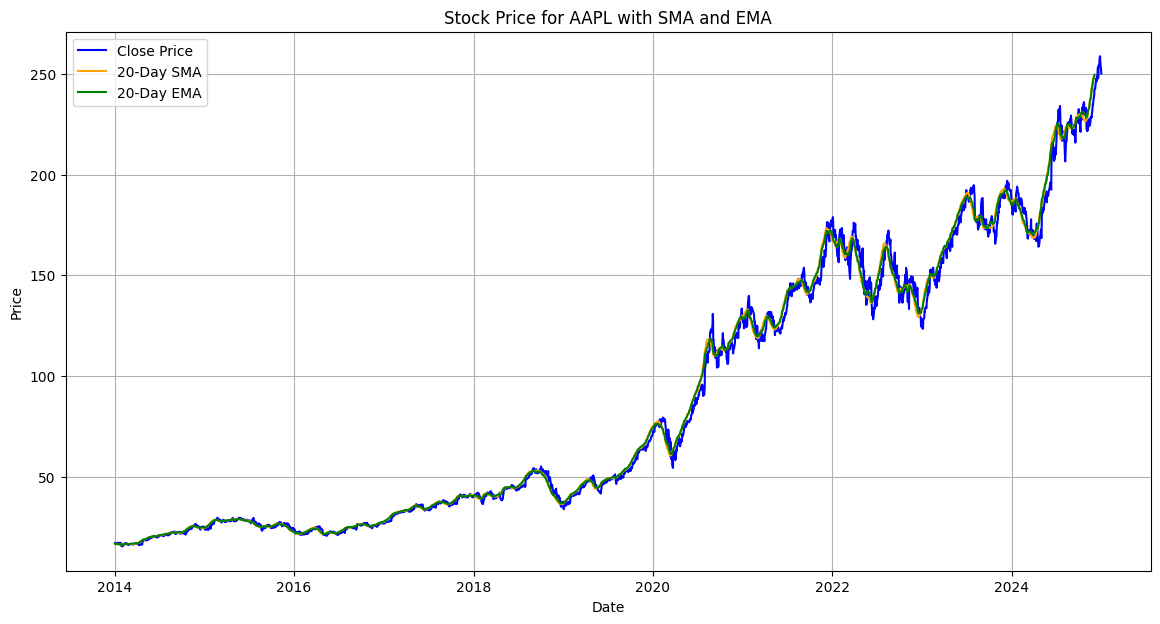

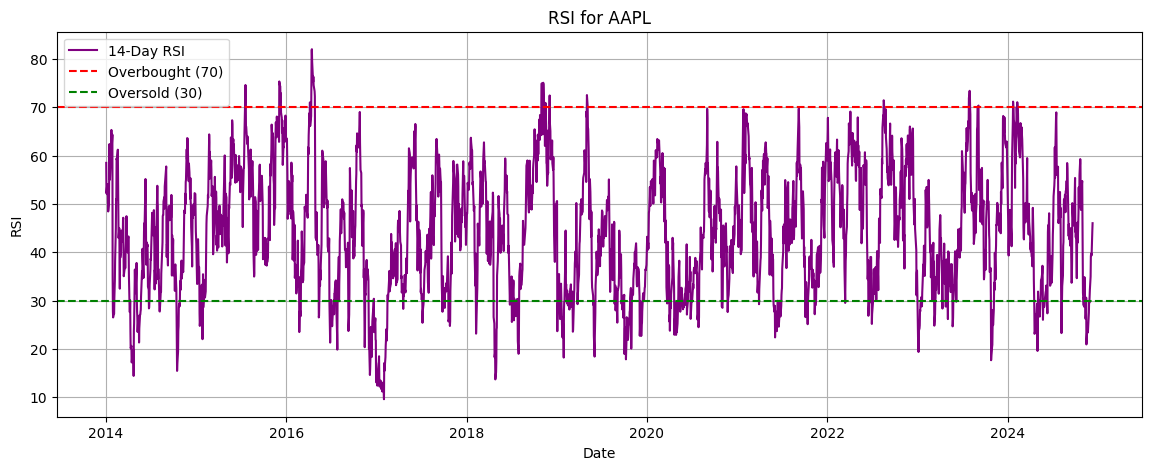

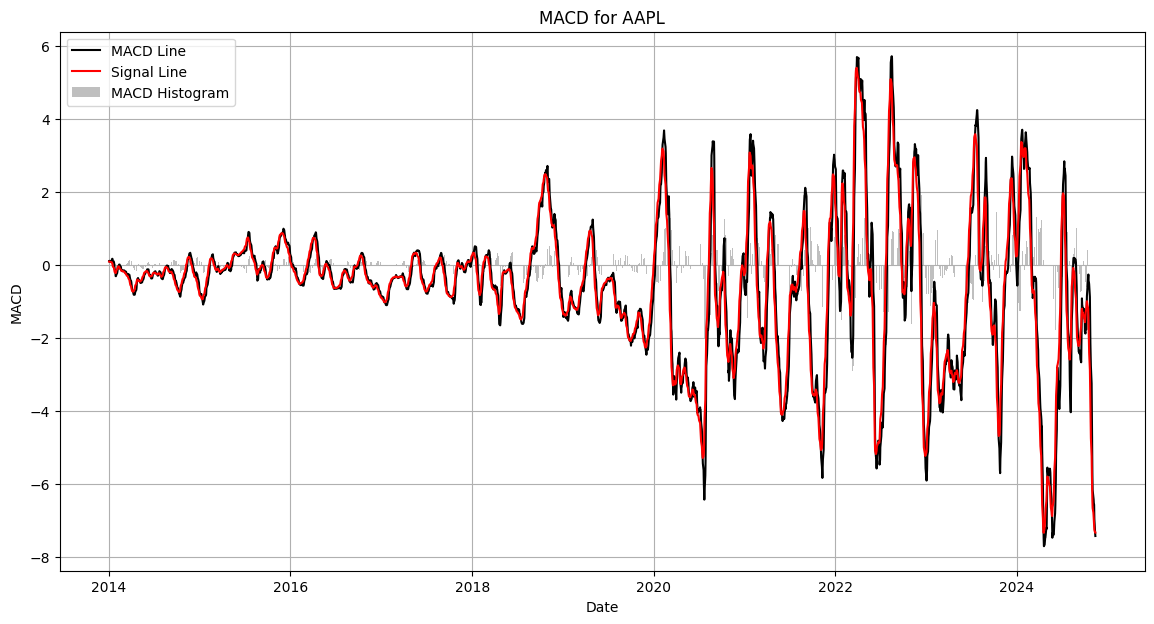

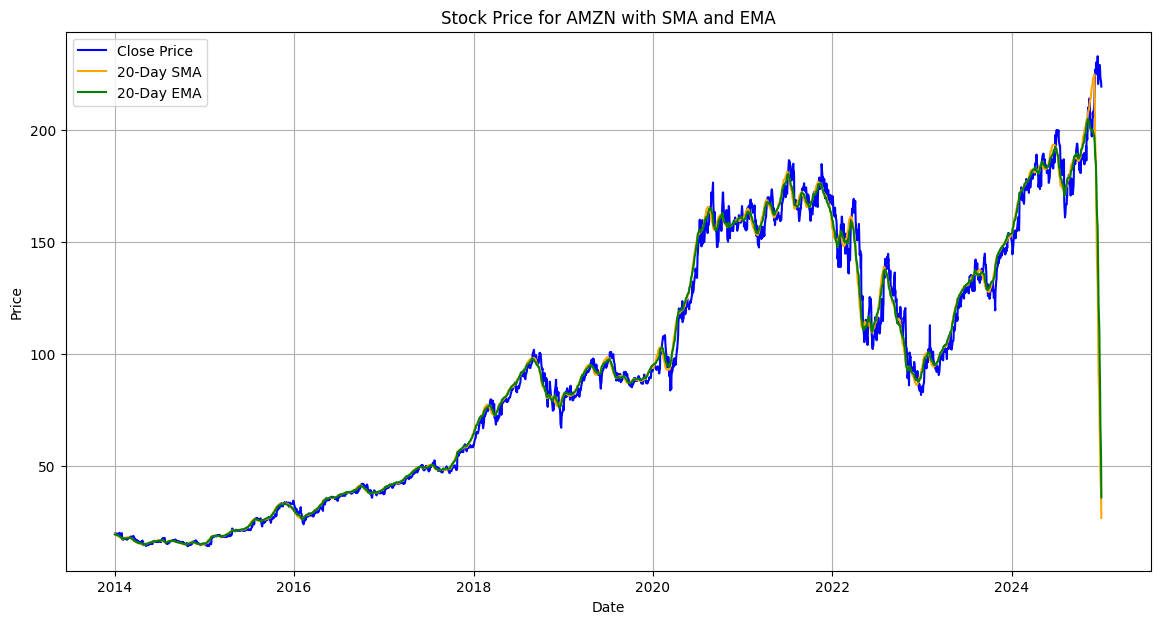

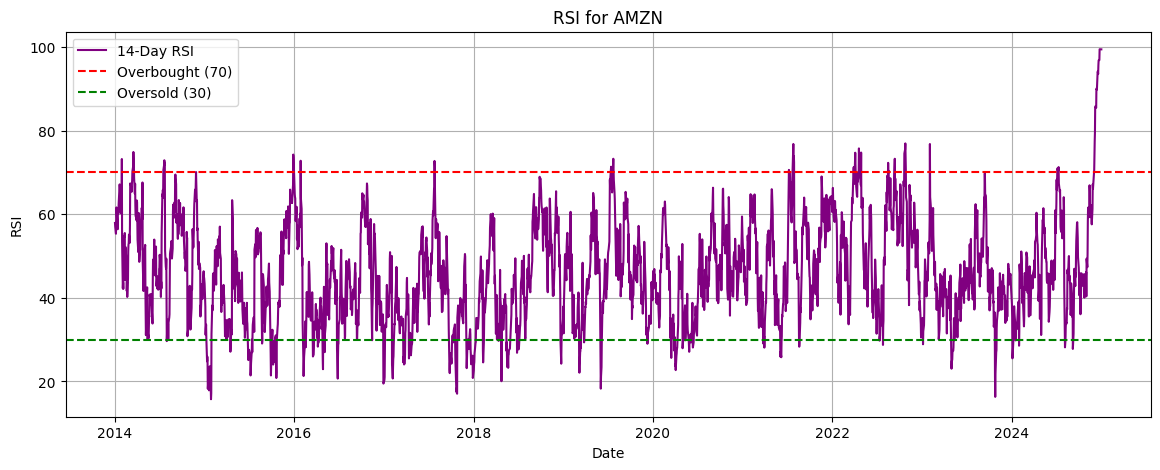

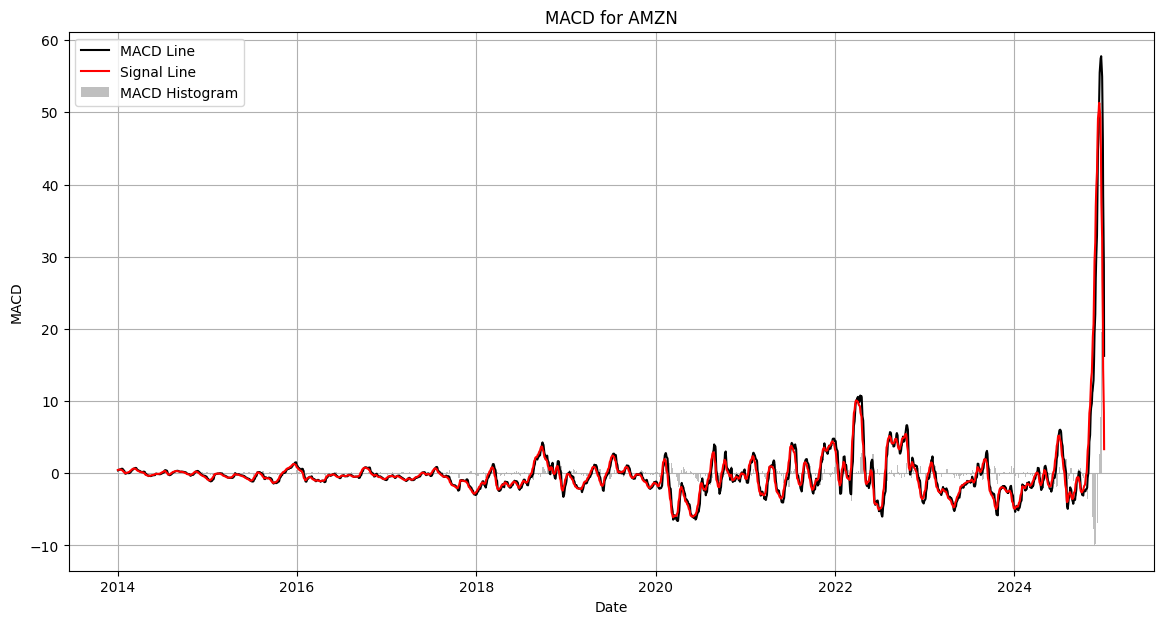

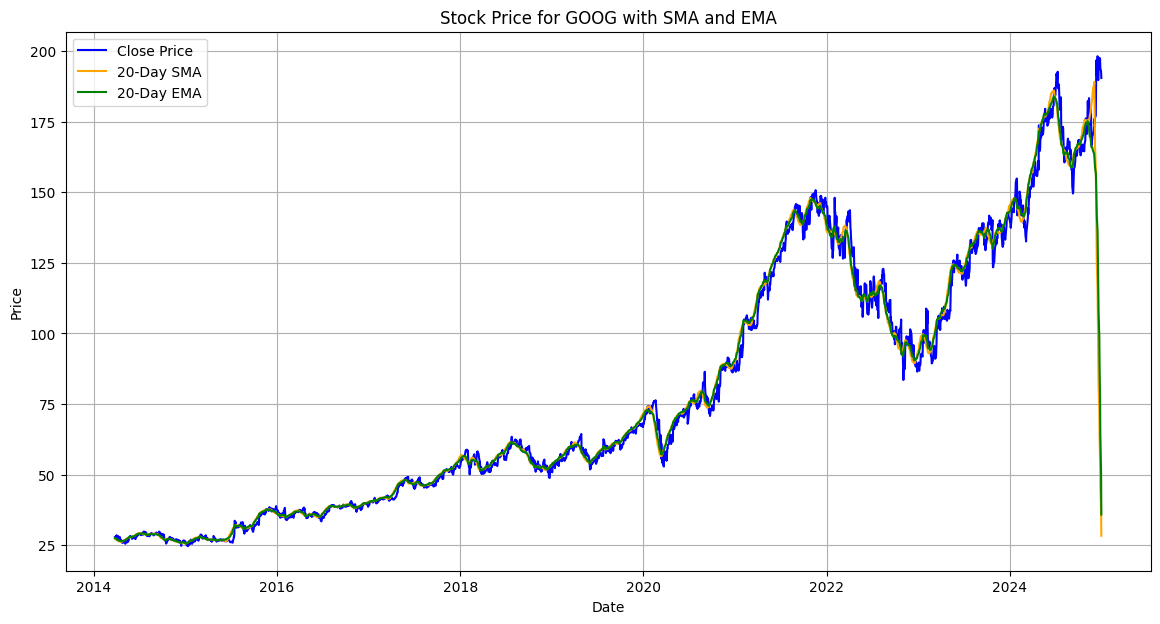

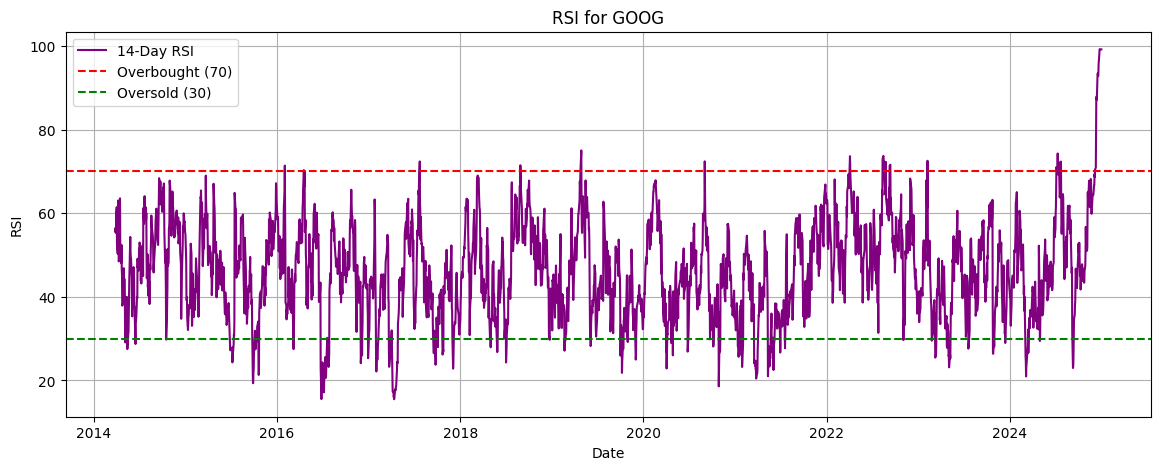

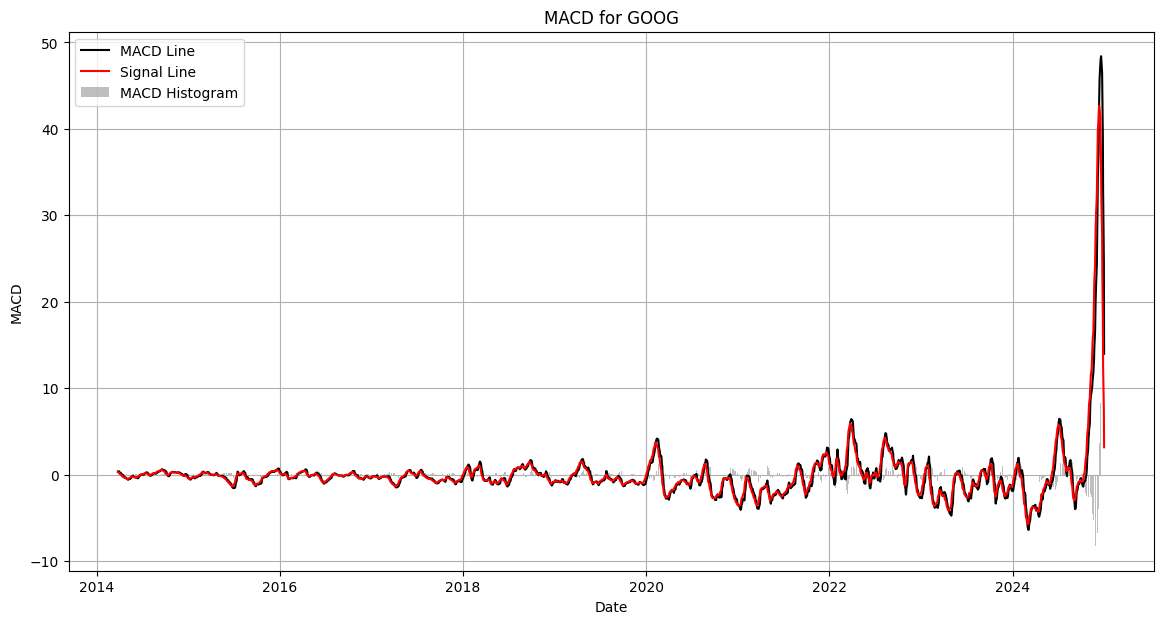

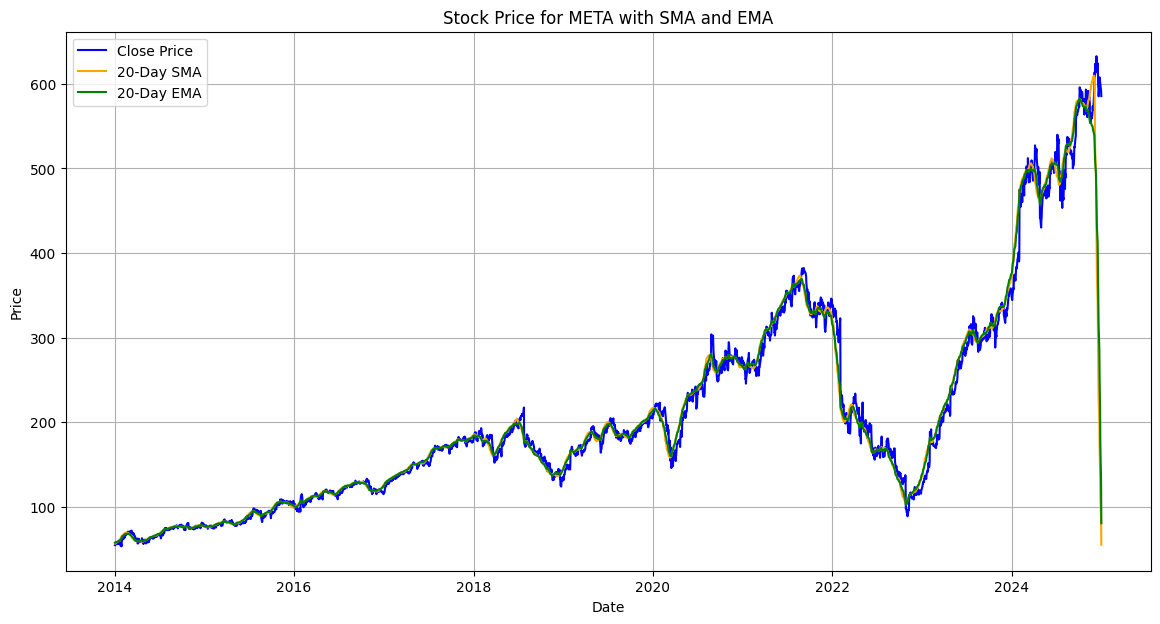

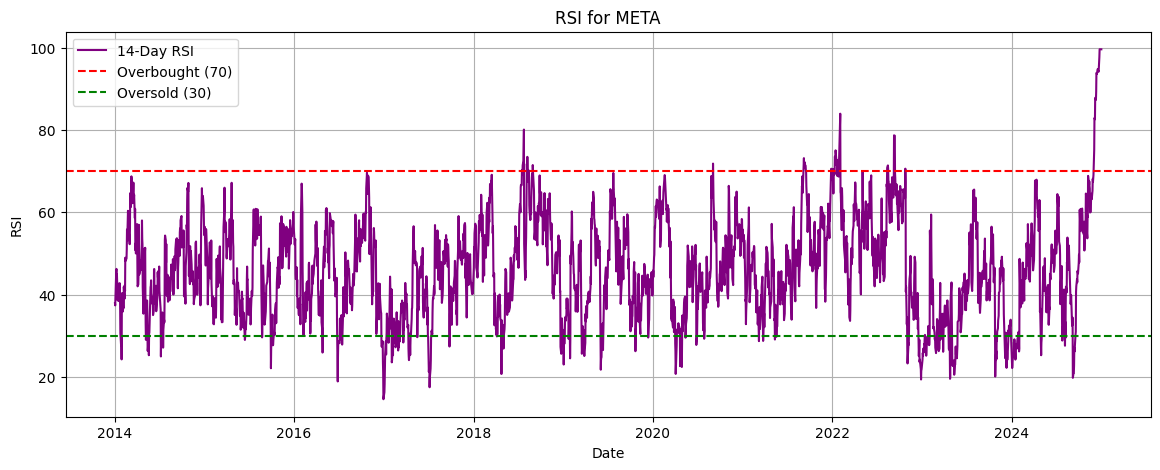

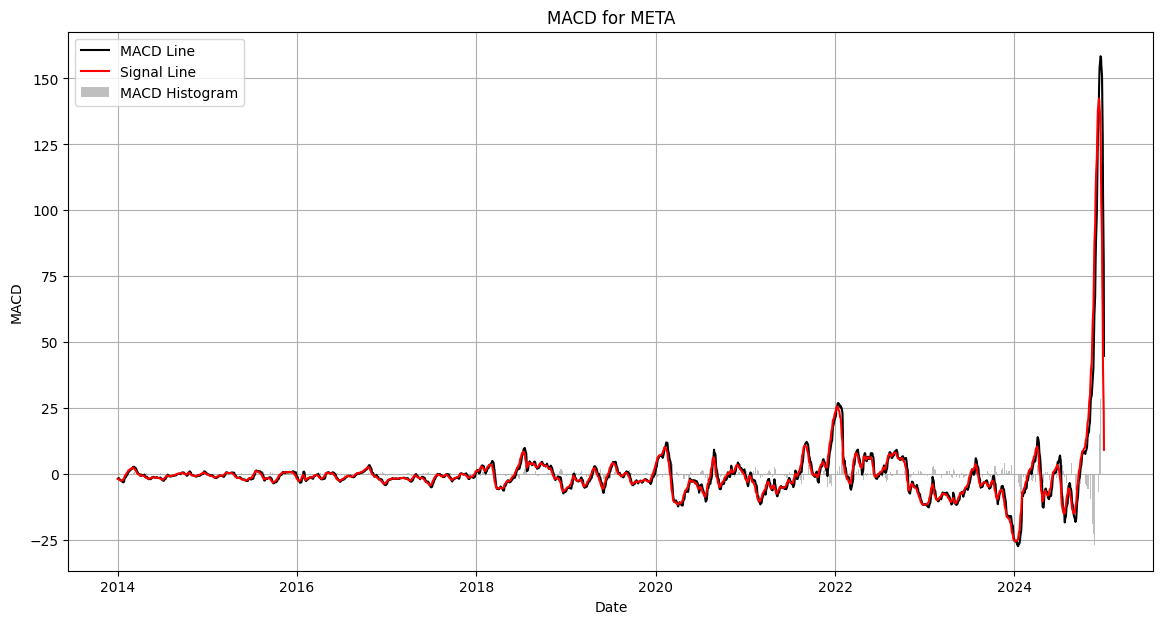

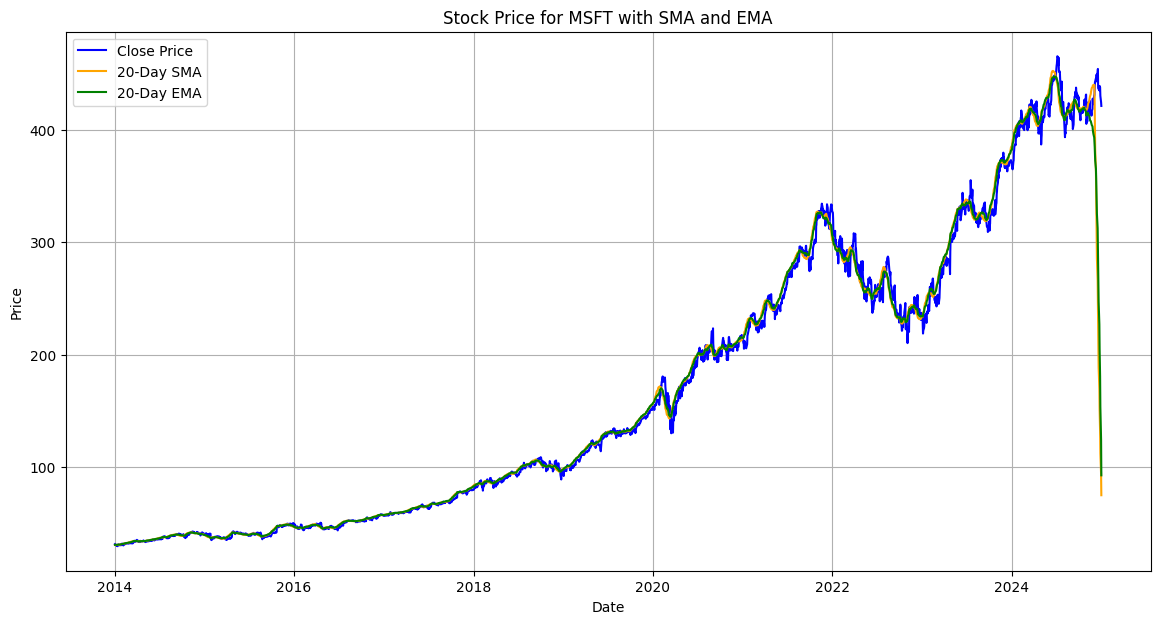

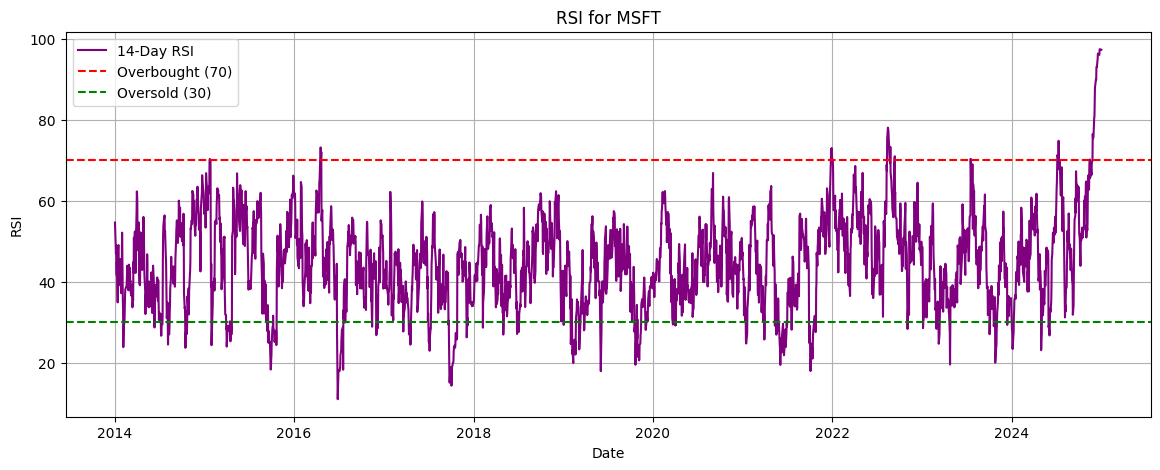

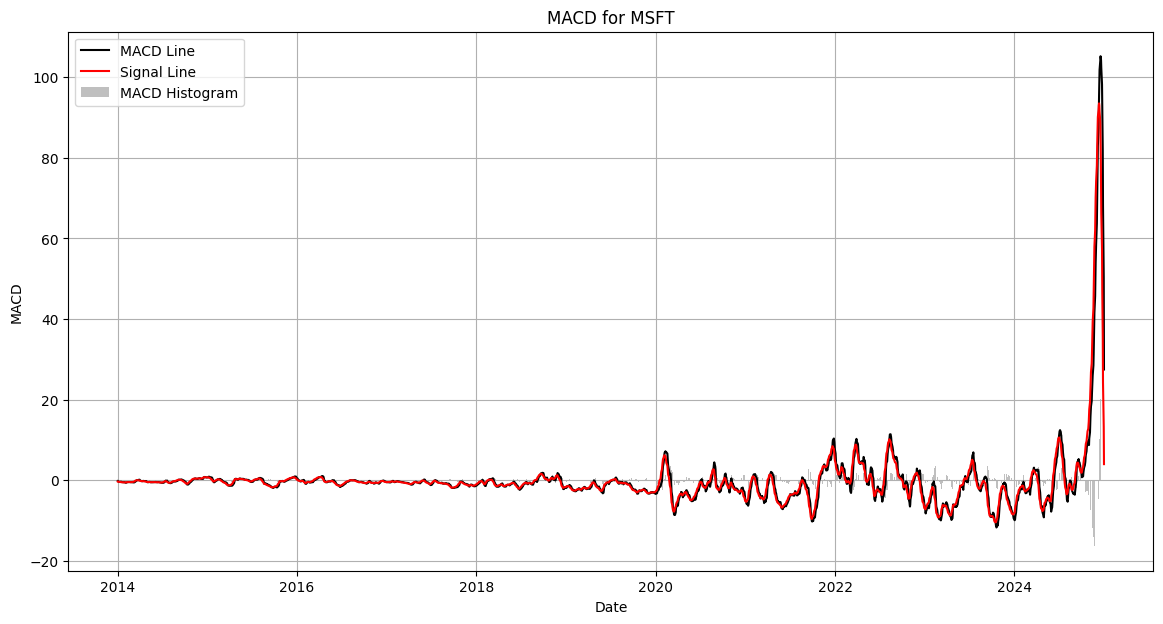

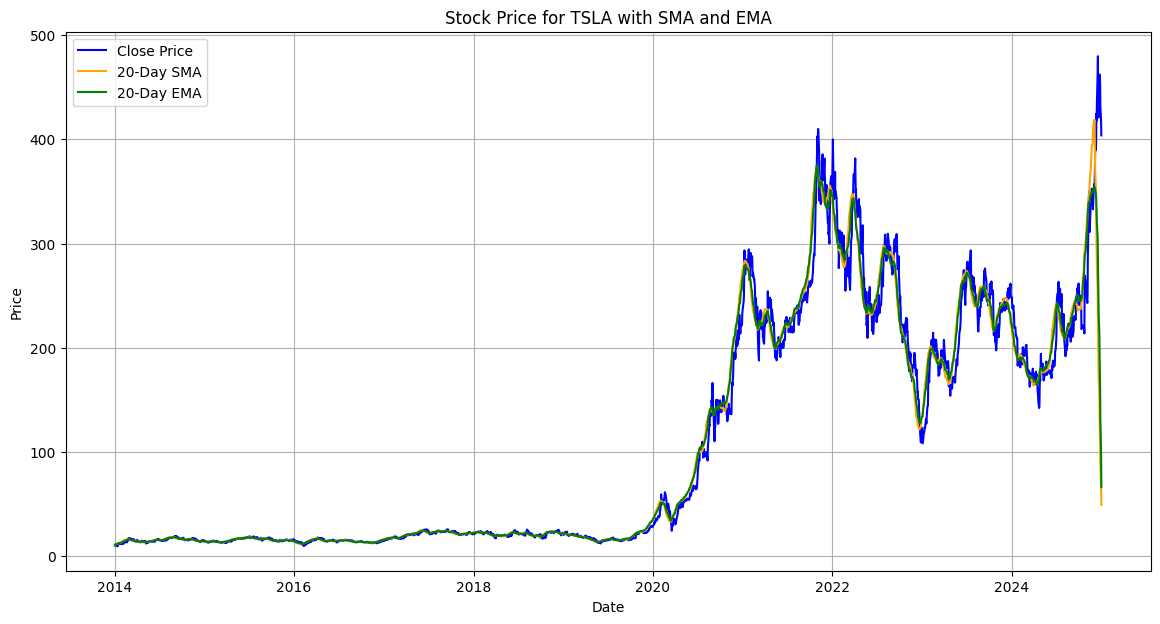

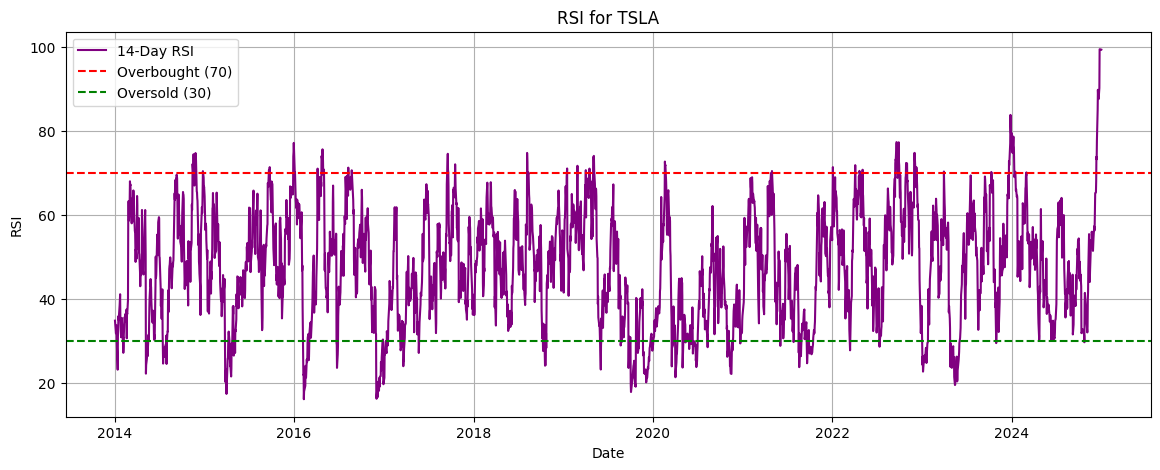

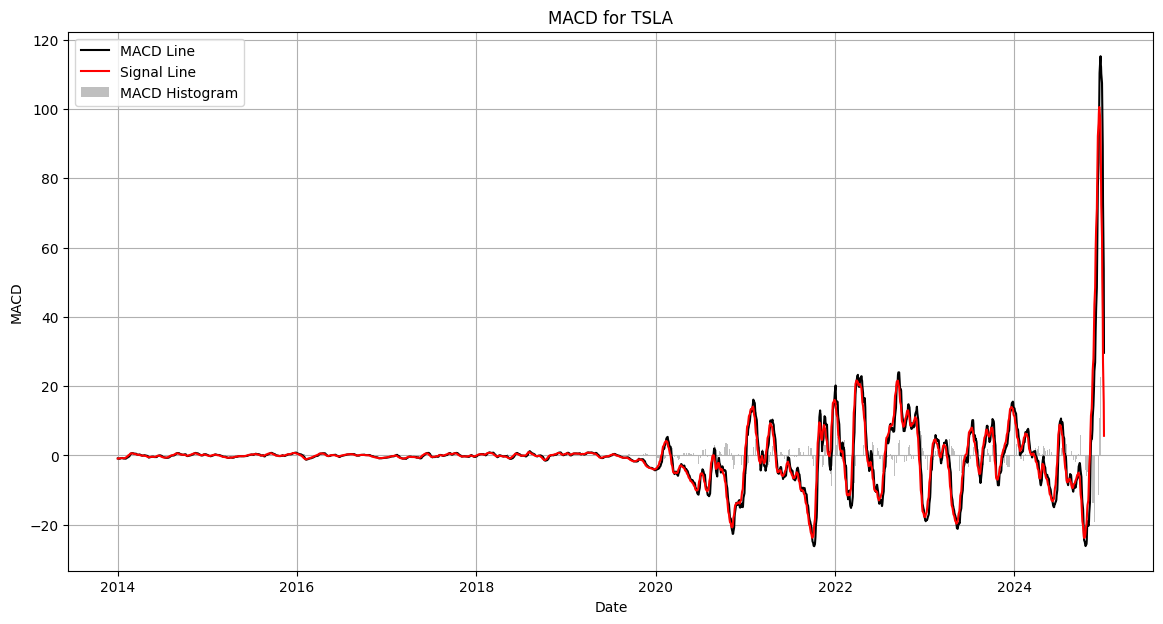

In [ ]:
for stock in stocks:
    fig = plot_stock_data(stock, df)
    plt.show()

    fig = plot_rsi(stock, df)
    plt.show()
    
    fig = plot_macd(stock, df)
    plt.show()